# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 2. Анализ данных

Задание выполнил(а):

    Алметов Кирилл

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 1 балл. Всего в сумме можно получить, если правильно решить все задания, 20 баллов.

# Домашнее задание 2. Анализ данных

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [ ]:
DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'
BABIES = 'https://raw.githubusercontent.com/evgpat/datasets/main/babies_all.txt'

# Часть 1

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [ ]:
df = pd.read_csv(DIABETS)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

**"В переменной {название переменной} {количество} пропущенных значений"**

In [ ]:
missing= df.isnull().sum()

for column, count in missing.items():
    if count > 0:
        print(f"В переменной '{column}' {count} пропущенных значений")


В переменной 'Glucose' 5 пропущенных значений
В переменной 'BloodPressure' 35 пропущенных значений
В переменной 'SkinThickness' 227 пропущенных значений
В переменной 'Insulin' 374 пропущенных значений
В переменной 'BMI' 11 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [ ]:
discr = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
oth = ['BMI', 'DiabetesPedigreeFunction']

for column in discr:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

for column in oth:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

<ipython-input-7-7f49e9a933c5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
<ipython-input-7-7f49e9a933c5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [ ]:
statistics = df.describe()
statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Задание 4

У скольких женщин старше 50 лет обнаружен диабет?

In [ ]:
ans = df[(df['Age'] > 50) &  (df['Class'] == 1)]

count = ans.shape[0]

print(count)


38


## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [ ]:
top_3 = df.nlargest(3, 'Pregnancies')

print(top_3)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
159           17    163.0           72.0           41.0    114.0  40.9   
88            15    136.0           70.0           32.0    110.0  37.1   
298           14    100.0           78.0           25.0    184.0  36.6   

     DiabetesPedigreeFunction  Age  Class  
159                     0.817   47      1  
88                      0.153   43      1  
298                     0.412   46      1  


## Задание 6

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [ ]:
answ = df[(df['Age'] >= 30) & (df['Age'] <= 40) & (df['Pregnancies'] >= 3)]

count = answ.shape[0]

count


142

## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [ ]:
total = df.shape[0]

good = df[(df['BloodPressure'] >= 80) & (df['BloodPressure'] <= 89)].shape[0]

ans = (good / total) * 100
ans


18.880208333333336

## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [ ]:
average_blood_pressure = df['BloodPressure'].mean()

alls = df[df['BMI'] >= 30]

our = alls[alls['BloodPressure'] > average_blood_pressure].shape[0]
our


251

## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [ ]:
mean_1 = df.groupby('Class')['Glucose'].mean()

print(mean_1)


Class
0    110.682000
1    142.130597
Name: Glucose, dtype: float64


In [ ]:
mean_2 = df.groupby('Class')['BloodPressure'].mean()

print(mean_2)

Class
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64


In [ ]:
mean_3 = df.groupby('Class')['Insulin'].mean()

print(mean_3)

Class
0    127.792000
1    164.701493
Name: Insulin, dtype: float64


## Задание 10

Постройте гистограммы для любых двух количественных признаков.

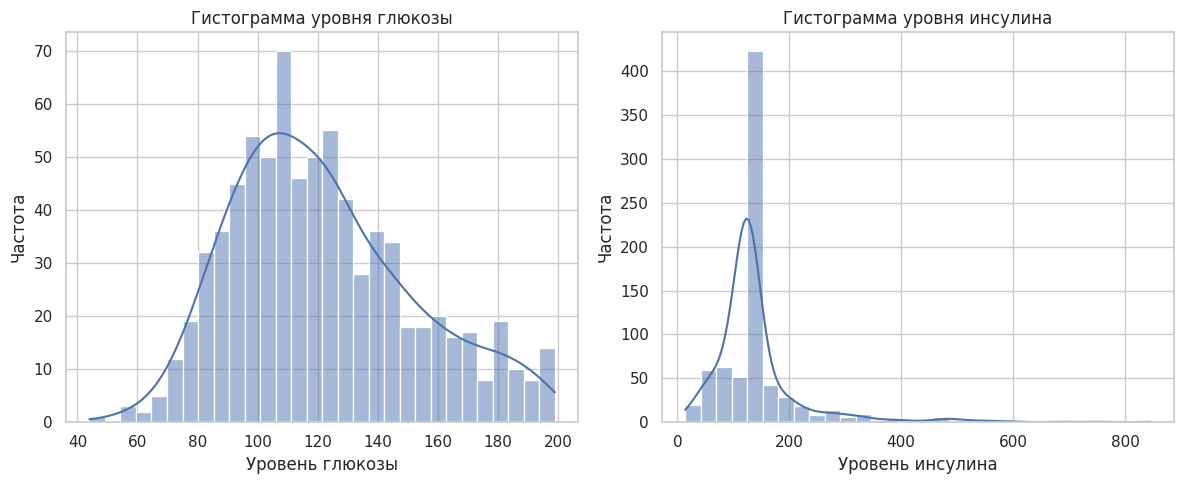

In [ ]:
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Glucose'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Гистограмма уровня глюкозы')
axs[0].set_xlabel('Уровень глюкозы')
axs[0].set_ylabel('Частота')


sns.histplot(df['Insulin'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Гистограмма уровня инсулина')
axs[1].set_xlabel('Уровень инсулина')
axs[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()


## Задание 11

Постройте круговую диаграмму для признака __Class__.

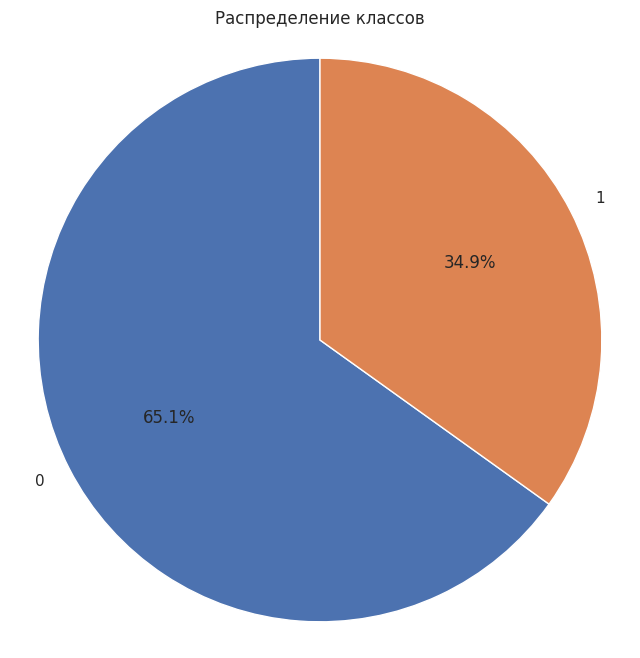

In [ ]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов')
plt.axis('equal')

plt.show()


## Задание 12

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

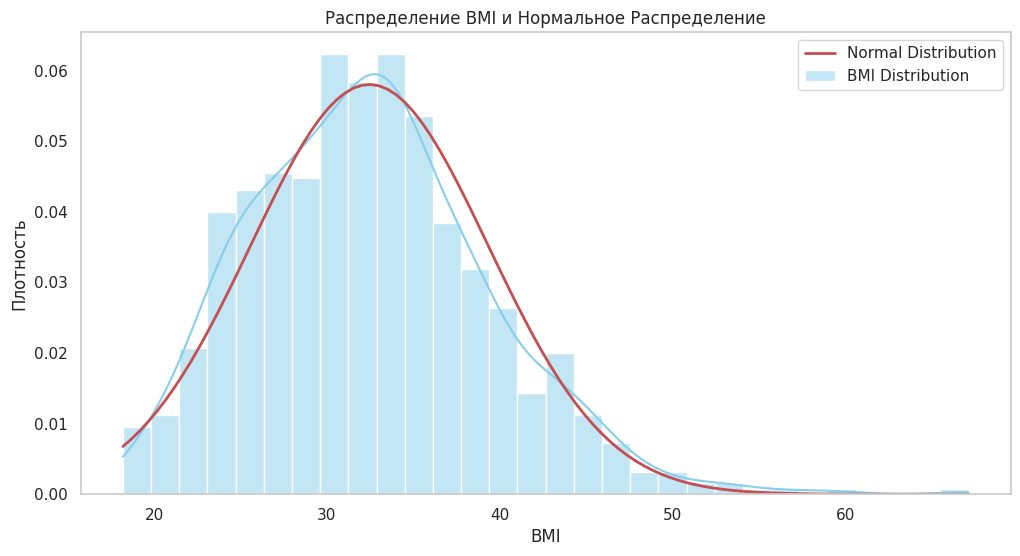

In [ ]:
from scipy import stats
import numpy as np


plt.figure(figsize=(12, 6))

sns.histplot(df['BMI'], bins=30, kde=True, stat='density', color='skyblue', label='BMI Distribution')


mean_bmi = df['BMI'].mean()
std_bmi = df['BMI'].std()
x = np.linspace(df['BMI'].min(), df['BMI'].max(), 100)
p = stats.norm.pdf(x, mean_bmi, std_bmi)

plt.plot(x, p, 'r-', label='Normal Distribution', linewidth=2)


plt.title('Распределение BMI и Нормальное Распределение')
plt.xlabel('BMI')
plt.ylabel('Плотность')
plt.legend()
plt.grid()

# Показать график
plt.show()


Постройте нормальное распределение поверх графика.

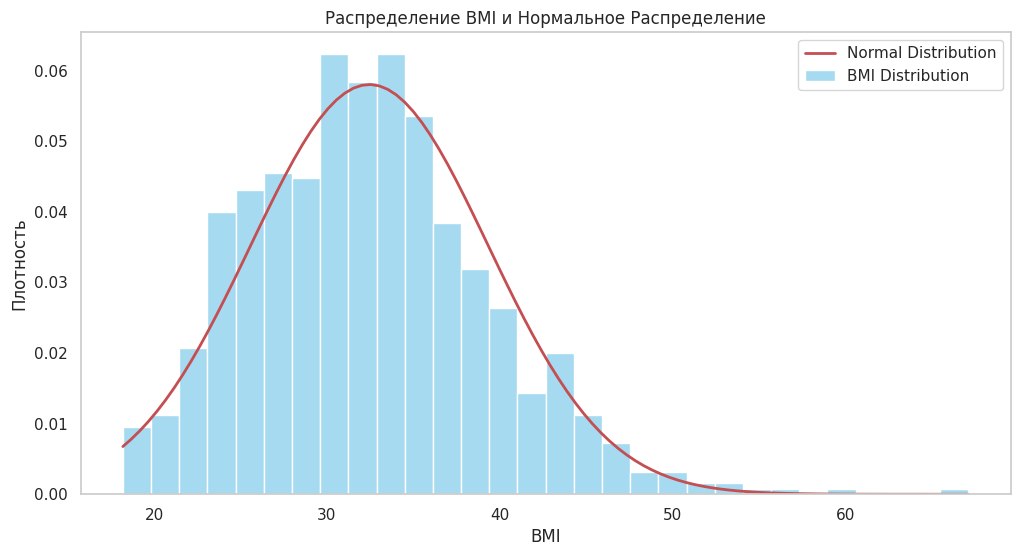

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df['BMI'], bins=30, kde=False, stat='density', color='skyblue', label='BMI Distribution')

mean_bmi = df['BMI'].mean()
std_bmi = df['BMI'].std()
x = np.linspace(df['BMI'].min(), df['BMI'].max(), 100)
p = stats.norm.pdf(x, mean_bmi, std_bmi)

plt.plot(x, p, 'r-', label='Normal Distribution', linewidth=2)

plt.title('Распределение BMI и Нормальное Распределение')
plt.xlabel('BMI')
plt.ylabel('Плотность')
plt.legend()
plt.grid()


## Задание 13

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

<ipython-input-25-63837e7a73a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pregnancies', y='Class', data=diabetes_percentage, palette='viridis')


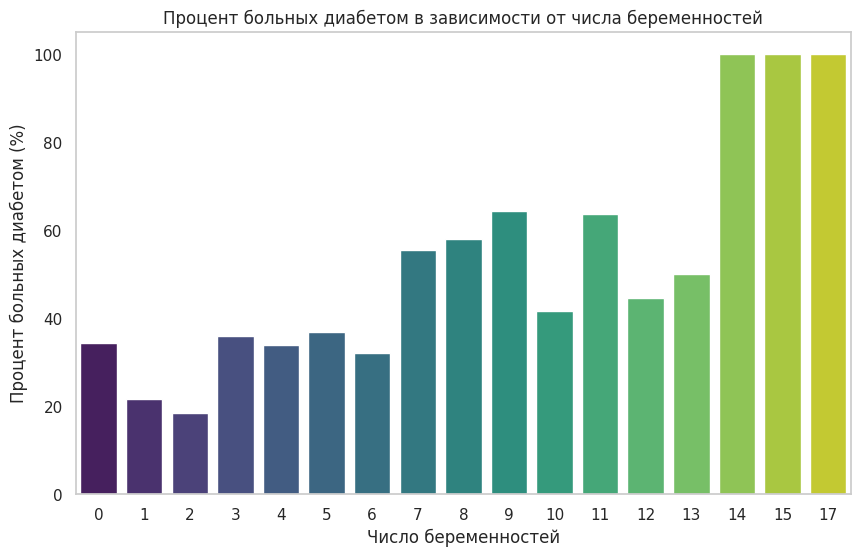

In [ ]:
diabetes_percentage = df.groupby('Pregnancies')['Class'].mean() * 100

diabetes_percentage = diabetes_percentage.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pregnancies', y='Class', data=diabetes_percentage, palette='viridis')

plt.title('Процент больных диабетом в зависимости от числа беременностей')
plt.xlabel('Число беременностей')
plt.ylabel('Процент больных диабетом (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')


plt.show()


## Задание 14

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [ ]:
df['wasPregnant'] = (df['Pregnancies'] > 0).astype(int)



## Задание 15

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [ ]:
diab = df.groupby('wasPregnant')['Class'].mean() * 100

db = diab.reset_index()

print(db)


   wasPregnant      Class
0            0  34.234234
1            1  35.007610


## Задание 16

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [ ]:
bins = [-float('inf'), 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

df['bodyType'] = pd.cut(df['BMI'], bins=bins, labels=labels)

print(df[['BMI', 'bodyType']].head())


    BMI       bodyType
0  33.6        Obesity
1  26.6     Overweight
2  23.3  Normal weight
3  28.1     Overweight
4  43.1        Obesity


## Задание 17

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

# Часть 2

In [ ]:
babies = pd.read_csv(BABIES, index_col=0)
babies.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Задание 1

Исследуйте набор данных `babies`. Ответьте на вопросы.

1. Какие годы включает датасет

2. Какое имя в датасете находится по индексом 121?

3. Cколько всего родилось детей по имени 'Aaron' за все время?

4. Насколько больше за все время родилось мальчиков чем девочек?

5. Cколько мальчиков родилось в 2010?

6. Сколько в датасете девочек по имени John?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

2. Создайте фигуру matplotlib с 3 графиками один под другим.

3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y.

4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.

5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут `.index`

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.

4. Постройте 4 линейных графика - тренд для каждого имени за все время.

5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.

6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

7. Опишите тренды в ячейке markdown под графиками.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。